# R laboratory exercises 02
### Laboratory session: April 7, 2021
### Exercises due on: April 25, 2021

#### Samuele Piccinelli, 2027650
#### samuele.piccinelli@studenti.unipd.it

In [1]:
# import libraries and useful dependencies
library(ggplot2)
library(RConics)
library(latex2exp)
# plot settings
theme_set(theme_bw() + theme(text=element_text(size=10,  family="Times New Roman")))
# set random seed
set.seed(2027650)

#### Exercise 1
A set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values ($x$), with the corresponding probabilities given by 2 methods $p_1$ and $p_2$:

| $$x$$ | 15.58 | 15.9 | 16 | 16.1 | 16.2
| -: | :-: | :-: | :-: | :-: | :-: 
| $$p_1$$ | 0.15 | 0.21 | 0.35 | 0.15 | 0.14
| $$p_2$$ | 0.14 | 0.05 | 0.64 | 0.08 | 0.09

Evaluate the expected values, $E[x]$, and the variance, $Var(x)$, for both methods.

In [2]:
x = c(15.58, 15.9, 16, 16.1, 16.2)
p1 = c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 = c(0.14, 0.05, 0.64, 0.08, 0.09)

df <- data.frame(x,p1,p2)

In [3]:
# E[x] and var(x) for p1
E.x_p1 = sum(df$x*df$p1)
E.x2_p1 = sum((df$x^2)*df$p1)
var.x_p1 = (E.x2_p1 - E.x_p1^2)
paste('E[x] for $p_1$:',round(E.x_p1,3))
paste('var(x) for $p_1$:',round(var.x_p1,3))

[1] "E[x] for $p_1$: 15.959"

[1] "var(x) for $p_1$: 0.034"

In [4]:
# E[x] and var(x) for p2
E.x_p2 = sum(df$x * df$p2)
E.x2_p2 = sum((df$x^2)*df$p2)
var.x_p2 = (E.x2_p2 - E.x_p2^2)
paste('E[x] for $p_2$:',round(E.x_p2,3))
paste('var(x) for $p_2$:',round(var.x_p2,3))

[1] "E[x] for $p_2$: 15.962"

[1] "var(x) for $p_2$: 0.028"

#### Exercise 2
The waiting time, in minutes, at the doctor is about $30$ minutes, and the distribution follows an exponential _pdf_ with rate $1/30$.
1. Simulate the waiting time for $50$ people at the doctor's office and plot the relative histogram.
2. What is the probability that a person will wait for less than $10$ minutes?
3. Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using _R_).
4. What is the probability for waiting more than one hour before being received?

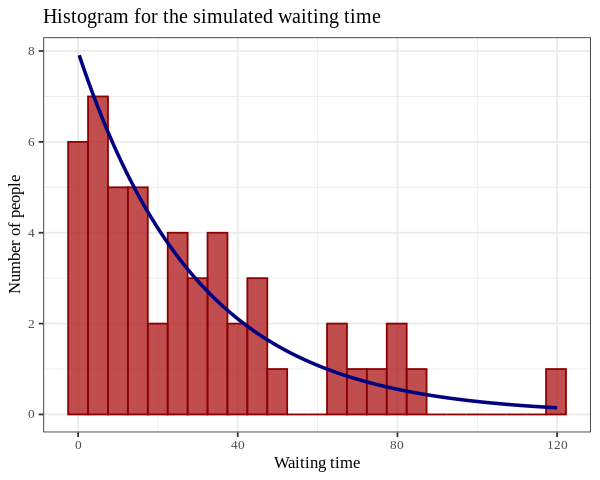

In [5]:
n <- 50; rate <- 1/30
data <- rexp(n, rate)
x <- seq(0,120); bins <- 25
# in order to superimpose the exp pdf to the histogram a multiplicative factor has to be taken into account
fact <- n*(max(data)-min(data))/bins
waiting_time <- data.frame('waiting_time' = data) # data frame with the simulated waiting time

options(repr.plot.width=5, repr.plot.height=4)
ggplot(waiting_time, aes(x=waiting_time)) +
geom_histogram(bins=bins, color='darkred', fill='firebrick', alpha=0.8) +
labs(title='Histogram for the simulated waiting time', x='Waiting time', y='Number of people') +
stat_function(fun = function(x) {fact*dexp(x, rate)}, color = 'navy', size=1)

In [6]:
x <- 0:max(waiting_time)
p.10 <- pexp(10, rate)
paste('The probability that a person will wait for less than 10 minutes is', round(p.10,2))

[1] "The probability that a person will wait for less than 10 minutes is 0.28"

In [7]:
sim_waiting_time <- mean(waiting_time$waiting_time) # E[waiting time] from the simulated data
pdf_waiting_time <- sum(x*dexp(x, rate)) # E[waiting time] from pdf
the_waiting_time <- 1/rate # E[waiting time] from theory

perc_diff1 <- abs(pdf_waiting_time-sim_waiting_time)*100/sim_waiting_time
perc_diff2 <- abs(the_waiting_time-sim_waiting_time)*100/sim_waiting_time

paste('Simulated average waiting time:', round(sim_waiting_time,1), 'min')
paste('Percentage difference from the expected mean value from pdf:', round(perc_diff1,2), '%')
paste('Percentage difference from the expected mean value from theory:', round(perc_diff2,2), '%')

[1] "Simulated average waiting time: 28.7 min"

[1] "Percentage difference from the expected mean value from pdf: 4.86 %"

[1] "Percentage difference from the expected mean value from theory: 4.61 %"

In [8]:
p.60 <- pexp(60, rate, lower.tail = FALSE)
cat('The probability for waiting more than one hour before being received is', round(p.60, 2))

The probability for waiting more than one hour before being received is 0.14

#### Exercise 3
Let's suppose that on a book, on average, there is one typo error every $3$ pages. If the number of errors follows a Poisson distribution, plot the _pdf_ and _cdf_, and calculate the probability that there is at least one error on a specific page of the book.

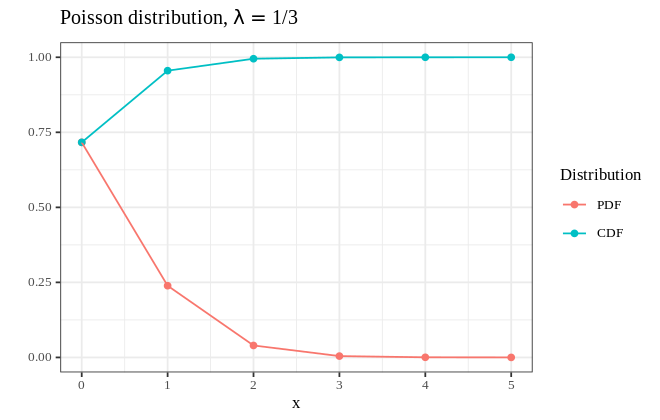

In [9]:
lambda <- 1/3 # the unit is here a page
x <- 0:5 # nr of errors in one page
poisson <- data.frame('x'=x, 'PDF'=dpois(x, lambda), 'CDF'=ppois(x, lambda))

d <- reshape2::melt(poisson, id.vars='x')
options(repr.plot.width=5.5, repr.plot.height=3.5)
ggplot(d, aes(x, value, col=variable)) + geom_point() + geom_line() +
labs(title=TeX('Poisson distribution, $\\lambda = 1/3$'), y='', col='Distribution')

In [10]:
p.1 <- 1 - dpois(0, lambda) # = ppois(1, lambda, lower.tail = FALSE) + dpois(1, lambda)
cat('The probability of having at least 1 error on a specific page of the book is', round(p.1, 2))

The probability of having at least 1 error on a specific page of the book is 0.28

#### Exercise 4
We randomly draw cards from a deck of $52$ cards, with replacement, until one ace is drawn. Calculate the probability that at least $10$ draws are needed.

***
The probability of obtaining the $r$-th success in $n$ trials is given by the negative binomial distribution: the relative cumulative distribution function `pnbinom()` is used and since $1$ success from the $10$-th draw onwards is considered, `size=1`.

In [11]:
x <- 0:10; p <- 4/52
p.10 <- pnbinom(9, size=1, prob=p, lower.tail = FALSE) + dnbinom(9, size=1, prob=p)
cat('The probability that at least 10 draws are needed is', round(p.10, 2))

The probability that at least 10 draws are needed is 0.49

The same result can be obtained by calculating the probability that $9$ failures happen in a row, i.e. $P[10\ \mathrm{draws}]=\left(\frac{52-4}{52}\right)^9$ or by means of the **geometric distribution** through `1 - pgeom(9, prob=p) + dgeom(9, prob=p)` (which is equivalent to `pgeom(8, prob=p, lower.tail=FALSE)`).

#### Exercise 5
the time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form
$$f(t)=\begin{cases} 
      c(t-1)(2-t) & 1 < t < 2  \\
      0 & \mathrm{otherwise} 
   \end{cases}$$
where $t$ is the time in hours.
1. Using the `integrate()` _R_ function, determine the constant $c$ (and verify it analytically).
2. Write the set of $4$ _R_ functions and plot the _pdf_ and _cdf_ respectively.
3. Evaluate the probability that the student will finish the aptitude test in more than $75$ minutes and that it will take between $90$ and $120$ minutes.

In [12]:
f.t <- function(t) {(t-1)*(2-t)}
total_integral <- integrate(f.t, lower=1, upper=2)
c <- 1 / total_integral$value # normalization condition
cat('c = ', c)

c =  6

Analytical check:
$$
\begin{align}
\int^2_1 c(t-1)(t-2)=1&& \rightarrow c\int^2_1 (3t-t^2-2)dt = 1 && \rightarrow c\left[\frac{3}{2}t^2-\frac{t^3}{3}-2t\right]^2_1 = 1 \implies c = 6\\
\end{align}
$$
Therefore:
$$f(t)=\begin{cases} 
      6(t-1)(2-t) & 1 < t < 2  \\
      0 & \mathrm{otherwise}
   \end{cases}$$
and
$$F(t)=\begin{cases}
      0 & \mathrm{if}\ t < 1 \\
      9t^2-2t^3-12t+5 & 1 \leq t \leq 2  \\
      1 & \mathrm{otherwise} 
   \end{cases}$$
since $F(t)=\int^t_1 6(x-1)(2-x)dx = 9t^2-2t^3-12t+5$.

In [13]:
dtolc <- function(t){
    pdf <- ifelse(1<t & t<2, 6*(t-1)*(2-t), 0)
    return(pdf)}

ptolc <- function(t){
    cdf <- ifelse(t<1, 0, ifelse(1<=t & t<=2, 9*t^2-2*t^3-12*t+5, 1))
    return(cdf)}

find_roots <- function(const){ # compute cubic roots of (F(t) - const)
    coeffs <- c(-2,9,-12,5-const)
    roots <- Re(cubic(coeffs))
    return (roots)}

rtolc <- function(n){ # inverse transform sampling method
    u <- runif(n)
    roots <- as.numeric(sapply(u, find_roots, simplify=TRUE)) # vectorize operation
    t <- roots[1<roots & roots<2] # by solving for t the values outside 1 <= t <= 2 are rejected
    return (t)}

qtolc <- function(q){
    roots <- as.numeric(sapply(q, find_roots, simplify=TRUE))
    quant <- roots[1<roots & roots<2]
    return (quant)}

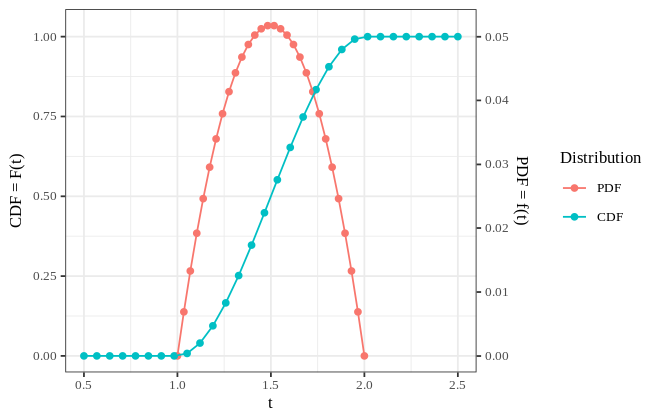

In [14]:
options(repr.plot.width=5.5, repr.plot.height=3.5)
coeff <- 20 # parameter to rescale the data

# Plot PDF
x_pdf <- seq(1,2,length.out=30)
pdf <- dtolc(x_pdf)/sum(dtolc(x_pdf))*coeff # normalize pdf and rescale the plot
x_cdf <- seq(0.5,2.5,length.out=30)
cdf <- ptolc(x_cdf)

distributions <- rbind(data.frame('x'=x_pdf, 'dist'=pdf, 'feature'='PDF'), data.frame('x'=x_cdf, 'dist'=cdf, 'feature'='CDF'))

ggplot(distributions) + geom_point(aes(x, dist, colour=feature)) + geom_line(aes(x, dist, colour=feature)) +
scale_y_continuous(name=TeX('CDF = $F(t)$'), sec.axis = sec_axis(~ . / coeff, name=TeX('PDF = $f(t)$'))) +
labs(x='t', col='Distribution')

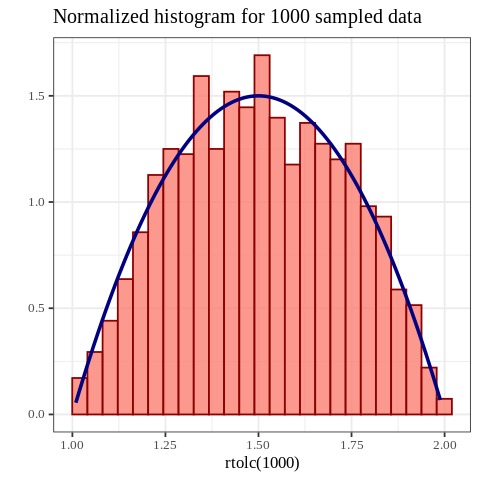

In [15]:
n <- 1000; x <- seq(0,120)
random_tolc <- data.frame('random_tolc' = rtolc(n))
options(repr.plot.width=4, repr.plot.height=4)
ggplot(random_tolc, aes(x=random_tolc)) +
geom_histogram(aes(y=..density..), bins=25, color='darkred', fill='salmon', alpha=0.8) + # normalize histogram
labs(title='Normalized histogram for 1000 sampled data', x='rtolc(1000)', y='') +
stat_function(fun = function(x) {dtolc(x)}, color = 'navy', size=1)

In [16]:
cat('The probability that the student finishes the test: \n\n')

t <- 75/60
p.75 = 1 - ptolc(t)
cat('in more than 75 minutes is', round(p.75,2), '\n')

t1 <- 90/60
t2 <- 120/60
p.90.120 <- ptolc(t2) - ptolc(t1)
cat('between 90 and 120 minutes is', round(p.90.120,2))

The probability that the student finishes the test: 

in more than 75 minutes is 0.84 
between 90 and 120 minutes is 0.5

#### Exercise 6
The lifetime of tires sold by an used tires shop is $10^4 \cdot x$ km, where $x$ is a random variable following the distribution function
$$f(x)=\begin{cases} 
      2/x^2 & 1 < x < 2  \\
      0 & \mathrm{otherwise} 
   \end{cases}$$
1. Write the set of $4$ _R_ functions and plot the _pdf_ and _cdf_ respectively.
2. Determine the probability that tires will last less than $15000$ km.
3. Sample $3000$ random variables from the distribution and determine the mean value and the variance, using the expression $Var(X) = E[X^2] - E[X]^2$.

***
The distribution function $f(x)$ above is already normalized; for the cumulative distribution function:
$$F(x)=\begin{cases}
      0 & \mathrm{if}\ x < 1 \\
      -\frac{2}{x} + 2 & 1 \leq x \leq 2  \\
      1 & \mathrm{otherwise} 
   \end{cases}$$

In [17]:
dtires <- function(x){
    pdf <- ifelse(1<x & x<2, 2/(x^2),0)
    return(pdf)}

ptires <- function(x){
    cdf <- ifelse(x<1, 0, ifelse(1<=x & x<=2, -(2/x)+2, 1))
    return(cdf)}

rtires <- function(n){ # inverse transform sampling method
    x <- 2/(2-runif(n))
    return (x)}

qtires <- function(q){
    x <- 2/(2-q)
    return (x)}

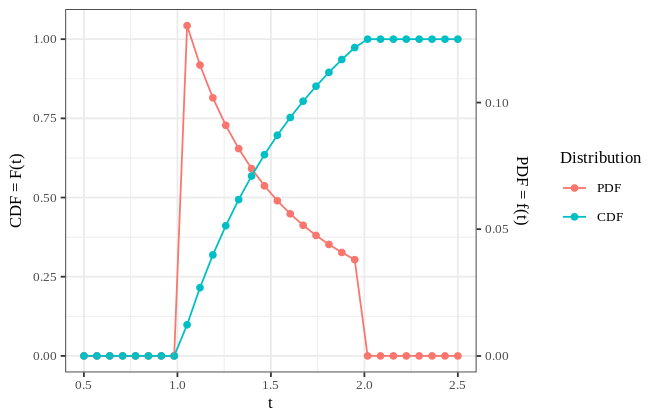

In [18]:
options(repr.plot.width=5.5, repr.plot.height=3.5)
coeff <- 8 # parameter to rescale the data

x_pdf <- seq(0.5,2.5,length.out=30)
pdf <- dtires(x_pdf)/sum(dtires(x_pdf))*coeff # normalize pdf and rescale the plot
x_cdf <- seq(0.5,2.5,length.out=30)
cdf <- ptires(x_cdf)

distributions <- rbind(data.frame('x'=x_pdf, 'dist'=pdf, 'feature'='PDF'), data.frame('x'=x_cdf, 'dist'=cdf, 'feature'='CDF'))

ggplot(distributions) + geom_point(aes(x, dist, colour=feature)) + geom_line(aes(x, dist, colour=feature)) +
scale_y_continuous(name=TeX('CDF = $F(t)$'), sec.axis = sec_axis(~ . / coeff, name=TeX('PDF = $f(t)$'))) +
labs(x='t', col='Distribution')

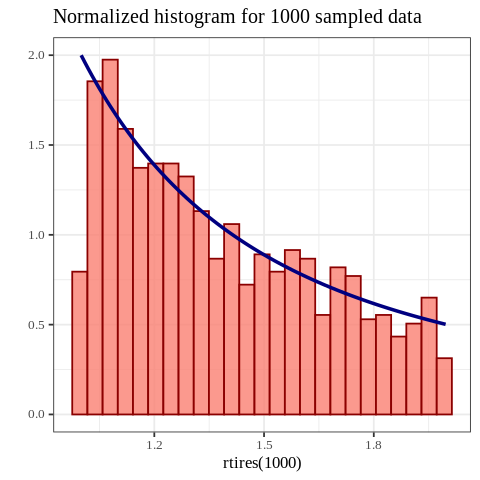

In [19]:
n <- 1000; x <- seq(0,120)
random_tires <- data.frame('random_tires' = rtires(n))
options(repr.plot.width=4, repr.plot.height=4)
ggplot(random_tires, aes(x=random_tires)) +
geom_histogram(aes(y=..density..), bins=25, color='darkred', fill='salmon', alpha=0.8) + # normalize histogram
labs(title='Normalized histogram for 1000 sampled data', x='rtires(1000)', y='') +
stat_function(fun = function(x) {dtires(x)}, color = 'navy', size=1)

In [20]:
x <- 15000/(10^4)
cat('The probability that the tires will last less than 15000 km is', round(ptires(x),2))

The probability that the tires will last less than 15000 km is 0.67

In [21]:
x <- rtires(3000) # generates 3k random variables from the distribution

E.x = sum(x*dtires(x))/sum(dtires(x))
E.x2 = sum((x^2)*dtires(x))/sum(dtires(x))
var.x = E.x2 - E.x^2
perc_E.x <- (mean(x) - E.x)*100/E.x
perc_var.x <- (var(x) - var.x)*100/var.x
paste('From $3000$ random variables generated from the distribution: $E[x]$=', round(E.x,2), ', $var(x)=$', round(var.x,2))
paste('The percentage differences from the built-in R functions are respectively:',
      round(perc_E.x,2), '% and', round(perc_var.x,2),'%')

[1] "From $3000$ random variables generated from the distribution: $E[x]$= 1.28 , $var(x)=$ 0.06"

[1] "The percentage differences from the built-in R functions are respectively: 7.4 % and 28.11 %"